# MidTerm Project


### <center>I**NTERNET VIDEO CONTENT AS A MEASURE OF GLOBAL INTERESTS**

##<center>YouTube Case Study </center>




*By Ebubechukwu Henrietta Umeobi*
</center>



#####<blockquote><center> ABSTRACT</center></blockquote>

Across decades, data through videos have been used to analyze people’s behavior, watch their spending habits and lifestyle and in a lot of cases, influence their decision making. Videos play a huge role in influencing marketing strategies across all industries and so the question remains: one can have a good product/solution, but how will it be sold?


######<blockquote><center> RESEARCH QUESTIONS</center></blockquote>
My research questions at the point of this projeect's proposal were:



*   Which category(ies) of videos are viewed the most on YouTube?
*   Is there a relationship between location and virality of a video?

* Which month(s) has the most viral videos?

* In the United States, which days of the week have the most views?

* Which category(ies) of videos were viewed the most at the beginning of the COVID19 pandemic?



Disclaimer: *My questions changed through the process of analyzing the data as in analyzing the data, I came across some shortcomings of the Google Colaboratory platform in loading all of my data set (dated 2017-2022) as Python colab could only access two years: 2017 and 2018*.

**Current Research Questions:**

<center> 


*   Which categor(ies) of videos are viewed the most on YouTube?
*   Which month has the highest trend?
* Which categor(ies) of videos were viewed the most prior to the COVID-19 pandemic in the United States? </center>

#### DATA
Using YouTube data, I'm curious to know what people are interested in watching. I chose this because internet content creation, especially video content, is simply one of the most interesting concepts of the 21st century. I retrieved my dataset from Kaggle’s YouTube videos updated data [here](http://136.183.56.191/dsa301data/USvideos.csv)


#### INSTRUMENTS AND GUIDELINES

* The project was executed using Python on Google Colaboratory interface. 
* In loading of the dataset, the **pandas** Python environment was used. This environment is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language 
* Analysis of the project was done using some analytics graphics tools such as Seaborn, Altair and MatPlot Library
* For the pupose of verification across other languages which specifically analyse my type of data set (database), Tableau Desktop was used. 

### YouTube Data Analysis Using Python Pandas



In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
from altair import Chart, X, Y, Color, Scale
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from wordcloud import WordCloud

The dataset "US Videos" has to be imported from the server loaction. the dataset is assigned the name "yt"

The trending date is parsed to avoid the dates being strings, hence uncalculable in analysis

In [ ]:
yt = pd.read_csv("http://136.183.56.191/dsa301data/USvideos.csv", parse_dates=['trending_date'])
yt.head()             # ".head" after the data name shows 5 rows of the uploaded dataset

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
yt.describe()     # ".describe()" shows the basic statistical description for each column that is calculable


,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
yt.info()           # ".info()" shows the types of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Although "parse" was used to change the date format, the code above shpws that the date is interpreted as a string object (word). Hence making it uncalcable. Deeper code is used to change the date form below

In [ ]:
#"datetime" environment is a more sophisticated way to edit dates than "parse" with options for the date format
from datetime import datetime 
yt['trending_date'] = pd.to_datetime(yt['trending_date'], format= '%y.%d.%m')


def changedate_formate(yt):
  split = yt.split('.')
  a = split[1]
  b = split[2]
  c = split[0]
  ''.join(a+b+c)
  return 

yt.info() #The trending date format can now be calculated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  object        
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

The YouTube categories are in primary keys/numbers, otherwise known as integers in python. This format is appropriate, as the IDs need to be calculated but for the purpose of understanding the data being analysed, the IDs need to have their names in string format (words) aliases.

In [ ]:
#A dictionary is created to replace the current Category ID in integers/numbers to strings/words aliases
yt['category_name']=yt['category_id'].replace({1 : "Film & Animation",     
     2 : "Autos & Vehicles",
     10:"Music",
     15: "Pets & Animals",
     17: "Sports",
     19: "Travel & Events",
     20: "Gaming",
     22: "People & Blogs",
     23: "Comedy",
     24: "Entertainment",
     25: "News & Politics",
     26: "Howto & Style",
     27: "Education",
     28: "Science & Technology",
     29: "Nonprofits & Activism",
     43: "Shows"
})


yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  object        
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

In [ ]:
#Checking for Not Available (NA) values
yt.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name               0
dtype: int64

In [ ]:
#Removing NA values
yt.dropna(inplace = True)

Data analysis for can easily be done through charts. 
Based on the research questions, these charts will be used to give a glimpse of our answers.

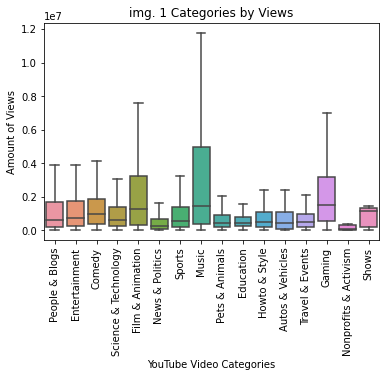

In [ ]:
#This sets the box plot by the axes and dataframe :
sns.boxplot(x="category_name", y="views", data= yt, showfliers=False) .set(title="img. 1 Categories by Views") 
plt.xlabel("YouTube Video Categories")                #It's important to label your x and y axis appropraitely 
plt.ylabel("Amount of Views")
plt.xticks(rotation= 90)
plt.show()

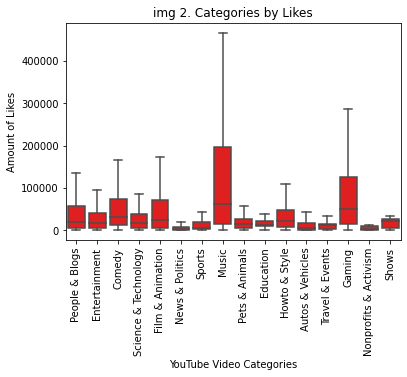

In [ ]:
#Create a box plot showing the amount of likes for each category of videos
sns.boxplot(x="category_name", y="likes", data= yt, showfliers=False, color="red") .set(title="img 2. Categories by Likes") 
plt.xlabel("YouTube Video Categories")              
plt.ylabel("Amount of Likes")
plt.xticks(rotation= 90)
plt.show()

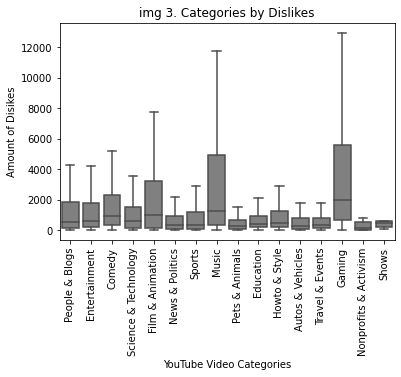

In [ ]:
#Create a box plot showing the amount of dislikes for each category of videos
sns.boxplot(x="category_name", y="dislikes", data= yt, showfliers=False, color="grey") .set(title="img 3. Categories by Dislikes") 
plt.xlabel("YouTube Video Categories")                
plt.ylabel("Amount of Disikes")
plt.xticks(rotation= 90)
plt.show()

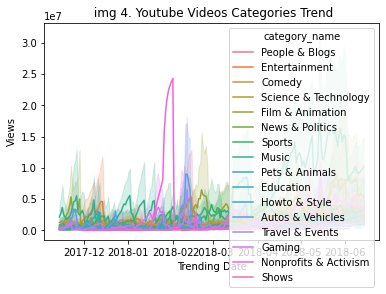

In [ ]:
#sns.lineplot( data= yt, x="category_name", y="trending_date",hue="category_name").set(title="Youtube Videos Categories") #THis sets the histogram by the axes and dataframe
sns.lineplot(data= yt, x="trending_date", y="views",hue="category_name").set(title=" img 4. Youtube Videos Categories Trend")
#sns.set(rc={'figure.figsize':(25,15)})
plt.xlabel("Trending Date")                #It's important to label your x and y axis appropraitely 
plt.ylabel("Views")
plt.show()

### Summary

 <center> Can YouTube Viewers be categorised as Music lovers or Blog consumers? </center>

#### ANSWERING THE RESEARCH QUESTIONS
*   Which categor(ies) of videos are viewed the most on YouTube?
*   Which month has the highest trend?
* Which categor(ies) of videos were viewed the most prior to the COVID-19 pandemic in the United States?

The analysis given in img 1. shows that the highest views on YouTube are in the Music category, followed by Film & Animation and Gaming categories.
Between the time frame of the data (2017 to June 2018), the highest viewing trend was in February 2018 in the People and Blogs category. Generally, prior to the discovery of SARS COVID-19 in December 2019, the TOP 5 most viewed video categories were: Music, Gaming, Film & Animation, Comedy and People's & Blogs. The LOWEST 5 viewed categories in the United States were (in no order): Education, NonProfits & Activism, News & Politics, Pets & Animals and Travels & Events.

However, using Tableau queries, the top viewed categories in the United States was and still is: Music, Science & Technology, Entertainment, Film & Animation and Gaming. This poses a hypothesis that viewers became more interested in Science & Technology due to the prevalence of the COVID-19 pandemic.

#### CONCLUSION
YouTube has been in existence since 2005 as a website for sharing videos. If the vision of the founders included people using video content creation as a way of making more income than newspapers, we might never know. But this almost 30 billion dollar company (statista, 2022), which makes more than 100 million dollars revenue from advertising **daily** by the first quarter of 2021 (Music Busines Worldwide, 2022), has majority of its views from the Music industry in our analysis.

A shortcoming of this project was the inability of the complete dataset to be uploaded using pandas, however, when queried with Structured Query Language (SQL) via Tableau, the analysis given is of *almost* equivalent value in this project as Music views has seen a steady increase from 2018 to 2022. 

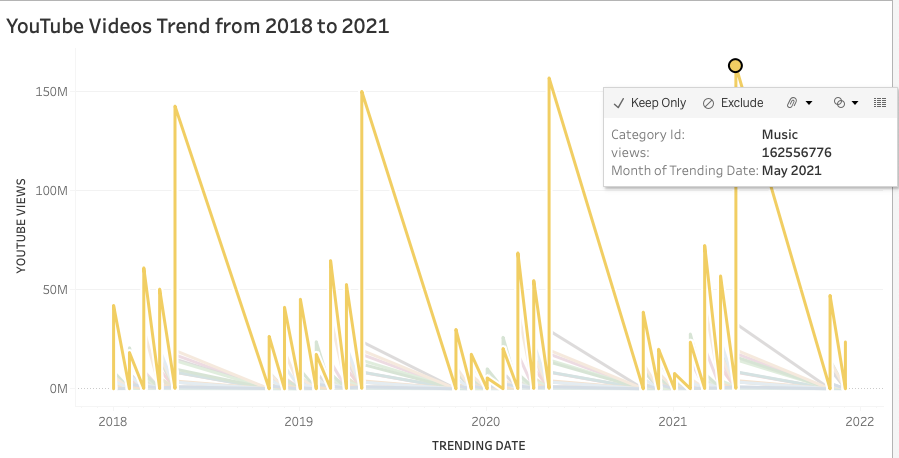

#### <center> REFERENCE </center>

[COVID-19 FIRST OBSERVATION](https://www.euro.who.int/en/health-topics/health-emergencies/coronavirus-covid-19/novel-coronavirus-2019-ncov#:~:text=On%2031%20December%202019%2C,2019%2DnCoV%E2%80%9D)

[YOUTUBE'S DAILY ADVERTISING REVENUE](https://www.musicbusinessworldwide.com/youtube-is-making-close-to-100m-from-advertising-revenues-every-day/)

[YOUTUBE'S NETWORTH](https://www.statista.com/statistics/289658/youtube-global-net-advertising-revenues/#:~:text=In%202021%2C%20YouTube's%20global%20advertising,in%20the%20preceding%20fiscal%20period.)

[QUICK HISTORY OF YOUTUBE](https://www.britannica.com/topic/YouTube)

[USING "PARSE" AND "DATE TIME"](https://betterprogramming.pub/how-to-work-with-dates-in-python-dafa47d5cb3e)

[PYTHON'S PANDAS](https://pandas.pydata.org/)



<center>The data being used is exclusively that of the United States of America from November 2017 to June 2018. It is used for the purpose of practicing Python packages in DSA301 course midterms at Buffalo State College and will be improved upon over the duration of the course. </center>

In [ ]:
%%shell
jupyter nbconvert --to html /Umeobi_Midterm_Project.ipynb

[NbConvertApp] Converting notebook /Umeobi_Midterm_Project.ipynb to html
[NbConvertApp] Writing 624977 bytes to /Umeobi_Midterm_Project.html
